# Test Case

In [1]:
import os
import sys
sys.path.append('..')

SAVE_PATH = '../reports/figures/test_case'
os.makedirs(SAVE_PATH, exist_ok=True)

### Simulate Passengers Demand

In [2]:
from src.robin.kernel.entities import Kernel

os.makedirs('../data/test_case', exist_ok=True)

path_config_supply = '../configs/test_case/supply_data.yml'
path_config_demand = '../configs/test_case/demand_data.yml'
seed = 0

kernel = Kernel(path_config_supply, path_config_demand, seed)
services = kernel.simulate('../data/test_case/output.csv', departure_time_hard_restriction=True)

### Plot Results

In [3]:
from src.robin.plotter.entities import KernelPlotter

kernel_plotter = KernelPlotter(
    path_output_csv='../data/test_case/output.csv',
    path_config_supply='../configs/test_case/supply_data.yml'
)

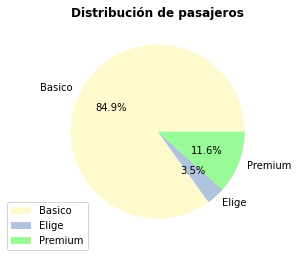

In [4]:
kernel_plotter.plot_tickets_sold_pie_chart(save_path=f'{SAVE_PATH}/pie.png')

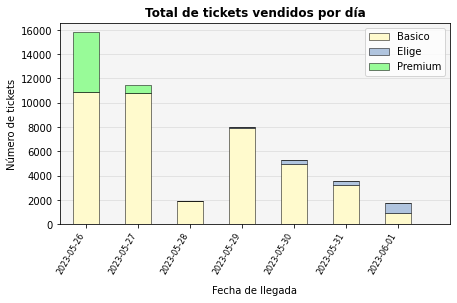

In [5]:
kernel_plotter.plot_tickets_sold(save_path=f'{SAVE_PATH}/total_tickets_sold.png')

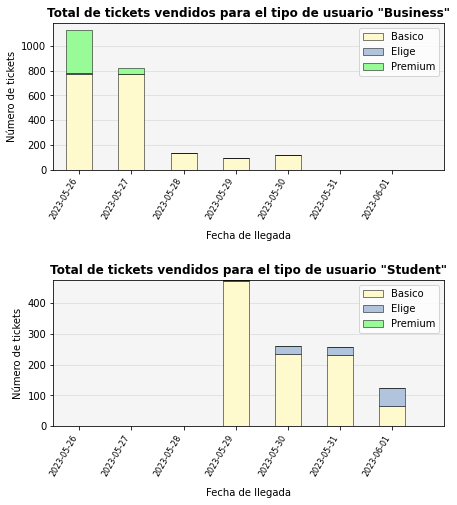

In [6]:
kernel_plotter.plot_tickets_sold_by_user(save_path=f'{SAVE_PATH}/tickets_sold_per_usertype.png')

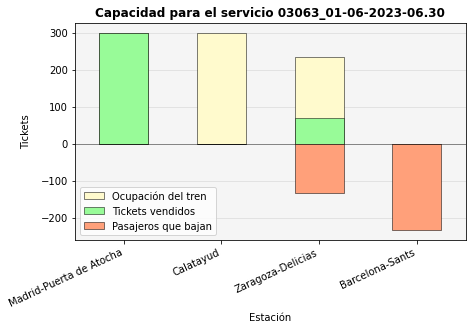

In [7]:
kernel_plotter.plot_capacity(service_id='03063_01-06-2023-06.30', save_path=f'{SAVE_PATH}/capacity.png')

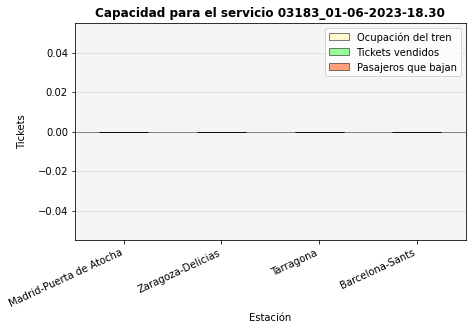

In [8]:
kernel_plotter.plot_capacity(service_id='03183_01-06-2023-18.30', save_path=f'{SAVE_PATH}/capacity2.png')

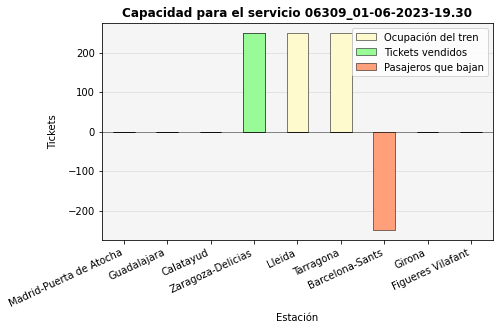

In [9]:
kernel_plotter.plot_capacity(service_id='06309_01-06-2023-19.30', save_path=f'{SAVE_PATH}/capacity3.png')

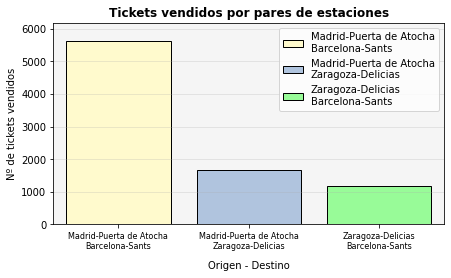

In [10]:
kernel_plotter.plot_pairs(save_path=f'{SAVE_PATH}/pairs.png')